In [120]:
using HTTP, CSV, DataFrames, StringEncodings, Plots

In [121]:
CONTENT_URL = "https://www.mhlw.go.jp/content/"

"https://www.mhlw.go.jp/content/"

In [122]:
POS_CSV = "pcr_positive_daily.csv"

"pcr_positive_daily.csv"

In [123]:
TST_CSV = "pcr_tested_daily.csv"

"pcr_tested_daily.csv"

In [124]:
SVR_CSV = "severe_daily.csv"

"severe_daily.csv"

In [125]:
DTH_CSV = "death_total.csv"

"death_total.csv"

In [126]:
DL_DIR = "./"

"./"

In [127]:
HTTP.download(string(CONTENT_URL, POS_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://www.mhlw.go.jp/content/pcr_positive_daily.csv
│   dest = ./pcr_positive_daily.csv
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 1.340 MiB/s
│   downloaded = 5.489 KiB
│   remaining = 0 bytes
│   total = 5.489 KiB
└ @ HTTP /home/ume/.julia/packages/HTTP/IAI92/src/download.jl:119


"./pcr_positive_daily.csv"

In [128]:
HTTP.download(string(CONTENT_URL, TST_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://www.mhlw.go.jp/content/pcr_tested_daily.csv
│   dest = ./pcr_tested_daily.csv
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 1.380 MiB/s
│   downloaded = 5.654 KiB
│   remaining = 0 bytes
│   total = 5.654 KiB
└ @ HTTP /home/ume/.julia/packages/HTTP/IAI92/src/download.jl:119


"./pcr_tested_daily.csv"

In [129]:
HTTP.download(string(CONTENT_URL, SVR_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://www.mhlw.go.jp/content/severe_daily.csv
│   dest = ./severe_daily.csv
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 1022.461 KiB/s
│   downloaded = 5.112 KiB
│   remaining = 0 bytes
│   total = 5.112 KiB
└ @ HTTP /home/ume/.julia/packages/HTTP/IAI92/src/download.jl:119


"./severe_daily.csv"

In [130]:
HTTP.download(string(CONTENT_URL, DTH_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://www.mhlw.go.jp/content/death_total.csv
│   dest = ./death_total.csv
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 1.018 MiB/s
│   downloaded = 5.210 KiB
│   remaining = 0 bytes
│   total = 5.210 KiB
└ @ HTTP /home/ume/.julia/packages/HTTP/IAI92/src/download.jl:119


"./death_total.csv"

In [131]:
ENCODING = enc"UTF-8"

UTF-8 string encoding

In [132]:
RATE_LIMIT = 1.0

1.0

In [133]:
pos_sum = 0

0

In [134]:
dth_sum = 0

0

In [135]:
function read_csv(file_path)
    df = CSV.File(open(read, file_path, ENCODING)) |> DataFrame
    return df
end

read_csv (generic function with 1 method)

In [136]:
df_pos = read_csv(string(DL_DIR, POS_CSV))

,日付,PCR 検査陽性者数(単日)
,String,Int64
1,2020/1/16,1
2,2020/1/17,0
3,2020/1/18,0
4,2020/1/19,0
5,2020/1/20,0
6,2020/1/21,0
7,2020/1/22,0
8,2020/1/23,0
9,2020/1/24,1


In [137]:
df_tst = read_csv(string(DL_DIR, TST_CSV))

,日付,PCR 検査実施件数(単日)
,String,Int64
1,2020/2/5,4
2,2020/2/6,19
3,2020/2/7,9
4,2020/2/8,4
5,2020/2/9,10
6,2020/2/10,12
7,2020/2/11,4
8,2020/2/12,10
9,2020/2/13,16


In [138]:
df_svr = read_csv(string(DL_DIR, SVR_CSV))

,日付,重症者数
,String,Int64
1,2020/2/5,0
2,2020/2/6,0
3,2020/2/7,0
4,2020/2/8,0
5,2020/2/9,0
6,2020/2/10,0
7,2020/2/11,0
8,2020/2/12,0
9,2020/2/13,0


In [139]:
df_dth = read_csv(string(DL_DIR, DTH_CSV))

,日付,死亡者数
,String,Int64
1,2020/2/14,1
2,2020/2/15,1
3,2020/2/16,1
4,2020/2/17,1
5,2020/2/18,1
6,2020/2/19,1
7,2020/2/20,1
8,2020/2/21,1
9,2020/2/22,1


In [140]:
function get_pos_sum(x)
    global pos_sum += x
    return pos_sum
end

get_pos_sum (generic function with 1 method)

In [141]:
function get_dth_day(x)
    global dth_sum
    y = dth_sum
    dth_sum = x
    return x - y
end

get_dth_day (generic function with 1 method)

In [142]:
df_pos[:, "累積感染者数"] = map(x -> get_pos_sum(x), df_pos[:, "PCR 検査陽性者数(単日)"])

377-element Array{Int64,1}:
      1
      1
      1
      1
      1
      1
      1
      1
      2
      3
      4
      4
      7
      ⋮
 314497
 321484
 327235
 332152
 337452
 342984
 348646
 353449
 358145
 362132
 364893
 368742

In [143]:
df_tmp = innerjoin(df_pos, df_tst, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施件数(単日)
,String,Int64,Int64,Int64
1,2020/2/5,2,16,4
2,2020/2/6,0,16,19
3,2020/2/7,0,16,9
4,2020/2/8,0,16,4
5,2020/2/9,0,16,10
6,2020/2/10,0,16,12
7,2020/2/11,0,16,4
8,2020/2/12,1,17,10
9,2020/2/13,4,21,16


In [144]:
df_tmp2 = innerjoin(df_tmp, df_svr, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施件数(単日),重症者数
,String,Int64,Int64,Int64,Int64
1,2020/2/5,2,16,4,0
2,2020/2/6,0,16,19,0
3,2020/2/7,0,16,9,0
4,2020/2/8,0,16,4,0
5,2020/2/9,0,16,10,0
6,2020/2/10,0,16,12,0
7,2020/2/11,0,16,4,0
8,2020/2/12,1,17,10,0
9,2020/2/13,4,21,16,0


In [145]:
df_dth[:, "死亡者数(単日)"] = map(x -> get_dth_day(x), df_dth[:, "死亡者数"])

348-element Array{Int64,1}:
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   ⋮
  65
  66
  55
  47
  99
  96
  87
 105
  84
  65
  74
  94

In [146]:
df = innerjoin(df_tmp2, df_dth, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施件数(単日),重症者数
,String,Int64,Int64,Int64,Int64
1,2020/2/14,7,28,43,2
2,2020/2/15,12,40,86,3
3,2020/2/16,6,46,65,3
4,2020/2/17,7,53,113,3
5,2020/2/18,7,60,9,6
6,2020/2/19,10,70,71,7
7,2020/2/20,9,79,90,9
8,2020/2/21,11,90,85,10
9,2020/2/22,27,117,96,11


In [147]:
df[:, "陽性率"] = df[:, "PCR 検査陽性者数(単日)"] ./ df[:, "PCR 検査実施件数(単日)"]

345-element Array{Float64,1}:
 0.16279069767441862
 0.13953488372093023
 0.09230769230769231
 0.061946902654867256
 0.7777777777777778
 0.14084507042253522
 0.1
 0.12941176470588237
 0.28125
 0.3076923076923077
 0.11538461538461539
 0.18181818181818182
 0.13095238095238096
 ⋮
 0.09546806401359581
 0.15644171779141106
 0.35858585858585856
 0.060874302056380225
 0.05130041717886423
 0.06372978203769411
 0.06601452739334725
 0.04742626366356285
 0.12652225455329238
 0.21225511073253833
 0.033694975653213895
 0.058023667747041534

In [148]:
function get_rate_limited(rate)
    global RATE_LIMIT
    if rate > RATE_LIMIT
        rate = RATE_LIMIT
    end
    return rate
end

get_rate_limited (generic function with 1 method)

In [149]:
df[:, "陽性率"] = map(x -> get_rate_limited(x), df[:, "陽性率"])

345-element Array{Float64,1}:
 0.16279069767441862
 0.13953488372093023
 0.09230769230769231
 0.061946902654867256
 0.7777777777777778
 0.14084507042253522
 0.1
 0.12941176470588237
 0.28125
 0.3076923076923077
 0.11538461538461539
 0.18181818181818182
 0.13095238095238096
 ⋮
 0.09546806401359581
 0.15644171779141106
 0.35858585858585856
 0.060874302056380225
 0.05130041717886423
 0.06372978203769411
 0.06601452739334725
 0.04742626366356285
 0.12652225455329238
 0.21225511073253833
 0.033694975653213895
 0.058023667747041534

In [150]:
df[:, "致死率"] = df[:, "死亡者数"] ./ df[:, "累積感染者数"]

345-element Array{Float64,1}:
 0.03571428571428571
 0.025
 0.021739130434782608
 0.018867924528301886
 0.016666666666666666
 0.014285714285714285
 0.012658227848101266
 0.011111111111111112
 0.008547008547008548
 0.007751937984496124
 0.0070921985815602835
 0.006711409395973154
 0.005847953216374269
 ⋮
 0.01392382121292095
 0.013826504584987123
 0.013751585252188794
 0.013689515643440352
 0.013767884024987258
 0.013825717817740769
 0.013850725377603644
 0.013959581155980071
 0.014011084895782434
 0.014036318248594436
 0.014132910195591585
 0.014240308942295696

In [151]:
println(df)

345×9 DataFrame
 Row │ 日付        PCR 検査陽性者数(単日)  累積感染者数  PCR 検査実施件数(単日)  重症者数  死亡者数  死亡者数(単日)  陽性率      致死率     
     │ String      Int64                   Int64         Int64                   Int64     Int64     Int64           Float64     Float64    
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 2020/2/14                        7            28                      43         2         1               1  0.162791    0.0357143
   2 │ 2020/2/15                       12            40                      86         3         1               0  0.139535    0.025
   3 │ 2020/2/16                        6            46                      65         3         1               0  0.0923077   0.0217391
   4 │ 2020/2/17                        7            53                     113         3         1               0  0.0619469   0.0188679
   5 │ 2020/2/18                        7            

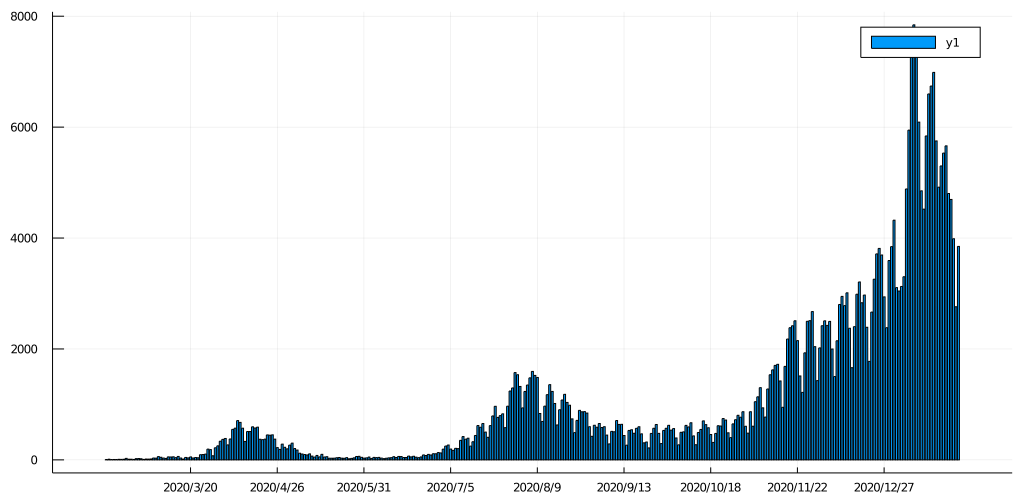

In [152]:
plot(df[:, "日付"], df[:, "PCR 検査陽性者数(単日)"], st=:bar, size=(1024, 500))

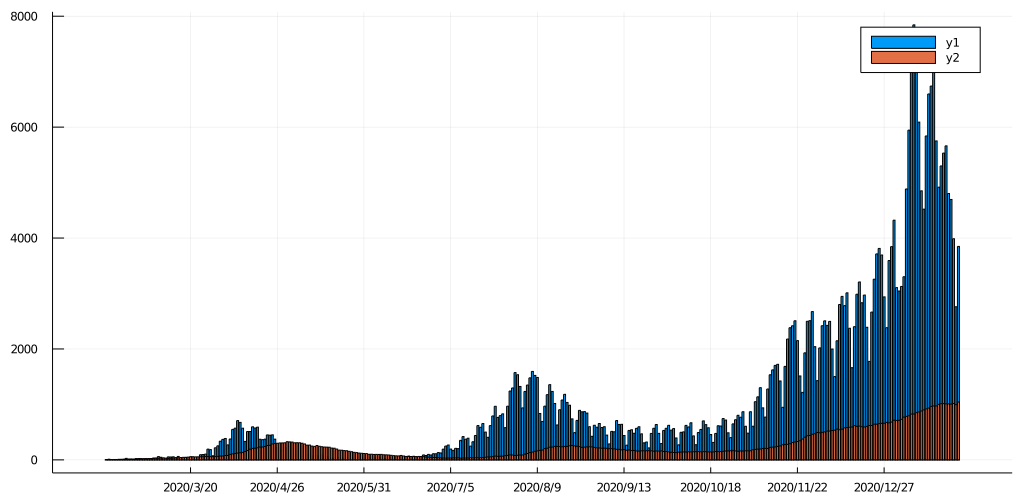

In [153]:
plot!(df[:, "日付"], df[:, "重症者数"], st=:bar, size=(1024, 500))

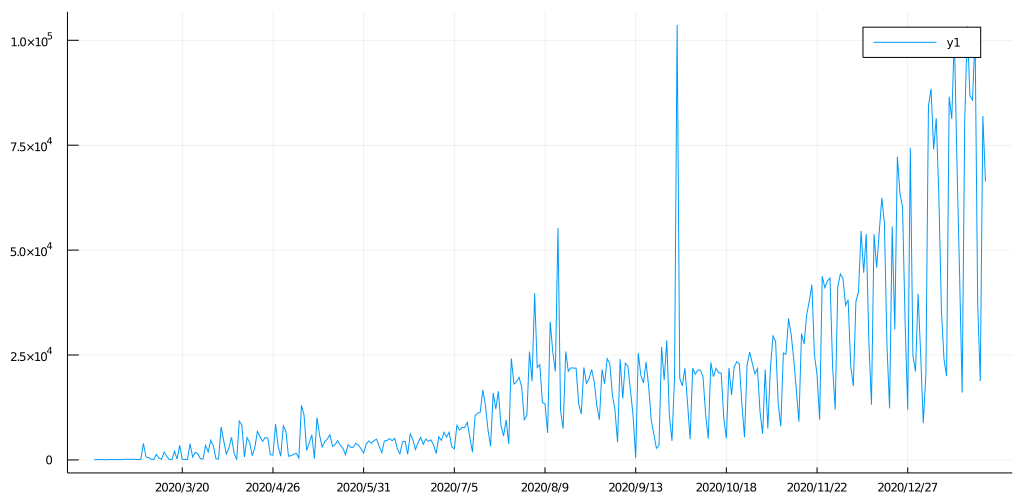

In [154]:
plot(df[:, "日付"], df[:, "PCR 検査実施件数(単日)"], size=(1024, 500))

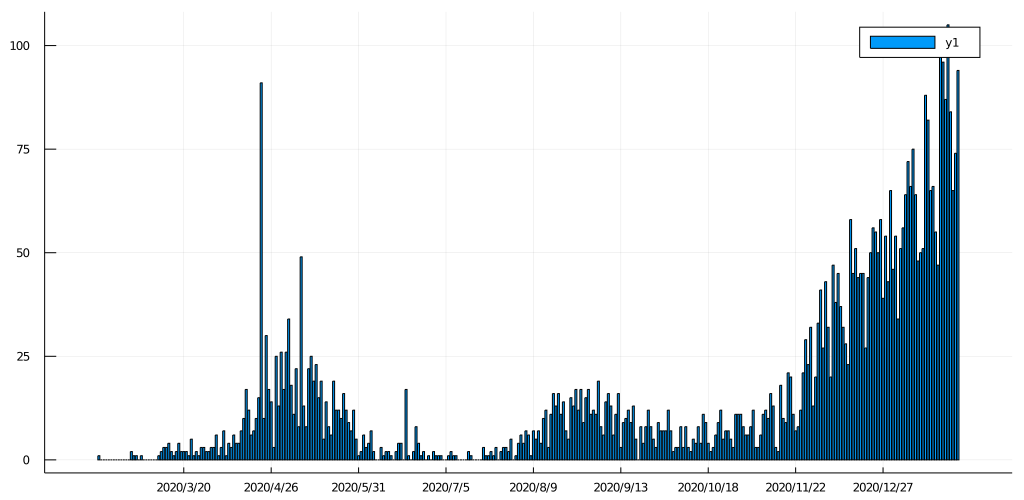

In [155]:
plot(df[:, "日付"], df[:, "死亡者数(単日)"], st=:bar, size=(1024, 500))

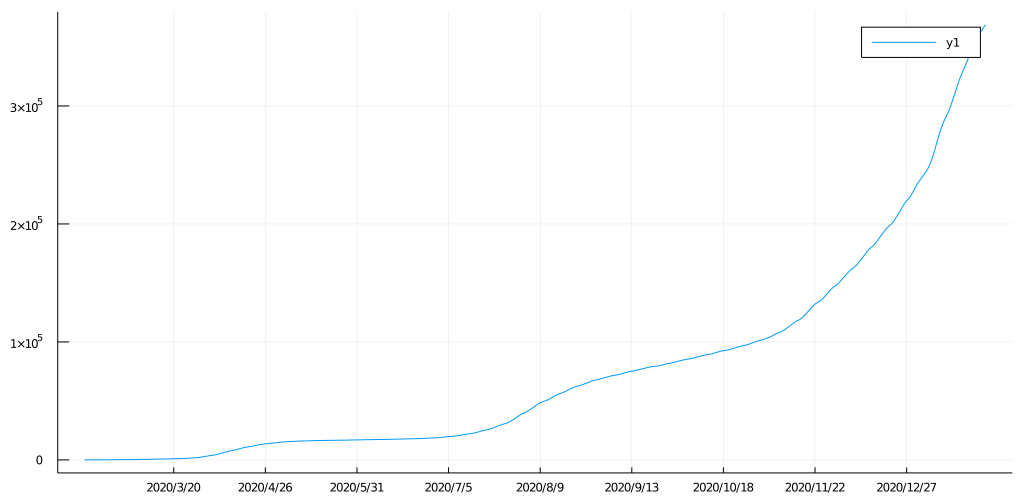

In [156]:
plot(df[:, "日付"], df[:, "累積感染者数"], size=(1024, 500))

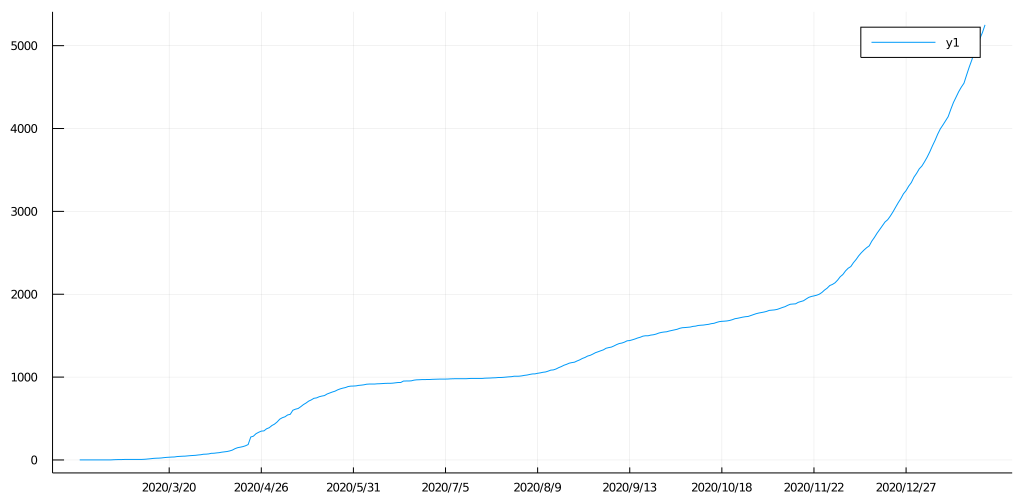

In [157]:
plot(df[:, "日付"], df[:, "死亡者数"], size=(1024, 500))

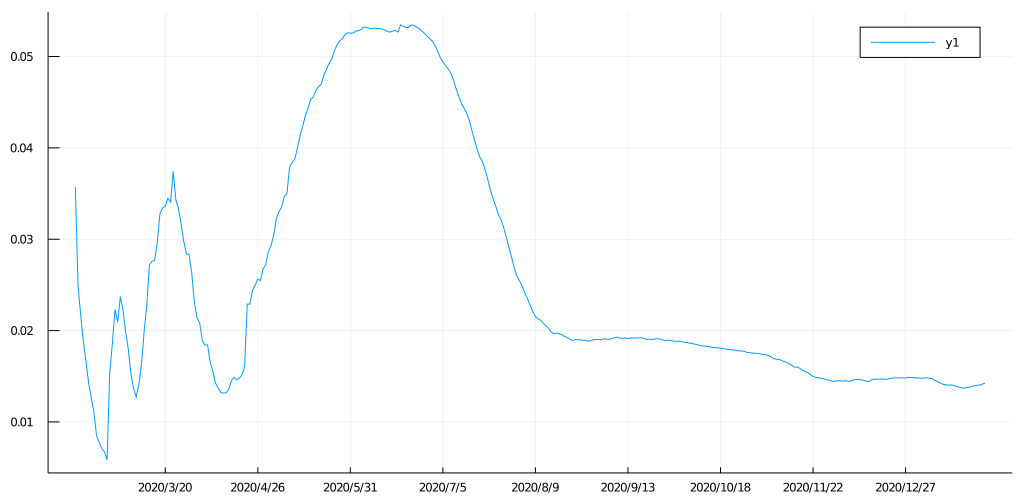

In [158]:
plot(df[:, "日付"], df[:, "致死率"], size=(1024, 500))

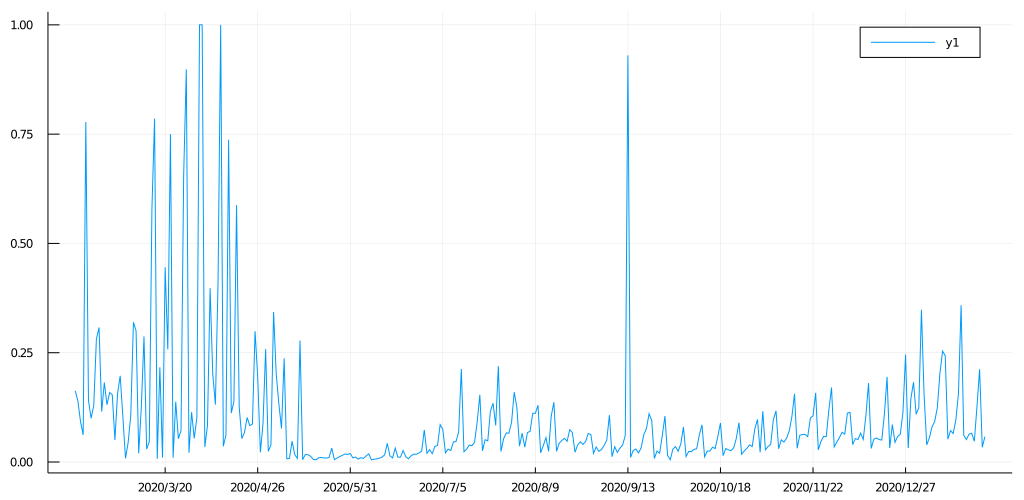

In [159]:
plot(df[:, "日付"], df[:, "陽性率"], size=(1024, 500))